In [112]:
import pandas as pd
import numpy as np
import pickle
import math
import psycopg2
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import model_selection
from sklearn import feature_selection
from sklearn import naive_bayes
from sklearn import metrics

In [54]:
%matplotlib inline

# Step 1: Load the data from the SQL tables.

In [121]:
conn = psycopg2.connect("dbname='ubuntu' user='ubuntu' host='localhost' password='metis123'")

In [134]:
X = pd.read_sql('SELECT * FROM "X"', conn)
y = pd.read_sql('SELECT * FROM y', conn)

In [138]:
X = X.drop('index', axis=1)

In [139]:
y = y['DRUG_USER']

In [140]:
X.shape

(57146, 109)

# Step 2: Explore model classification options

Get a cross validator set up for model exploration

In [57]:
cross_validator = model_selection.KFold(n_splits=5, shuffle=True, random_state=42)

Start model investigation with a random forest classifier. We'll use GridSearchCV to try and find our optimal parameters.

In [58]:
# n_features is number of trees, and more is always better (except when considering time), so use a bunch
rf = RandomForestClassifier(n_estimators=150)

In [59]:
# prioritize f1 score to try and minimize FN and FP, after we find our best model we can adjust the threshold to get
# the desired ratio between precision and recall
rf_grid = model_selection.GridSearchCV(rf, 
          param_grid={'max_features': [10, 15, 20], 'criterion': ['gini', 'entropy']},
          cv=cross_validator, scoring='f1', n_jobs=-1)

In [60]:
rf_grid.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': [10, 15, 20], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=0)

In [61]:
print(rf_grid.best_params_)
print(rf_grid.best_score_)
rf_best = rf_grid.best_estimator_

{'max_features': 20, 'criterion': 'gini'}
0.517926330001


In [62]:
# since the best max_features was at the top of our range, 
# re-run GridSearchCV with higher values to see if that improves our model score
rf = RandomForestClassifier(n_estimators=150, criterion='gini')
rf_grid_2 = model_selection.GridSearchCV(rf, 
          param_grid={'max_features': [20, 25, 30]},
          cv=cross_validator, scoring='f1', n_jobs=-1)

In [63]:
rf_grid_2.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': [20, 25, 30]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring='f1', verbose=0)

In [64]:
print(rf_grid_2.best_params_)
print(rf_grid_2.best_score_)
rf_best = rf_grid_2.best_estimator_

{'max_features': 25}
0.521593220519


In [65]:
# since the best max_features was at the top of our range, 
# re-run GridSearchCV with higher values to see if that improves our model score
rf = RandomForestClassifier(n_estimators=150, criterion='gini')
rf_grid_3 = model_selection.GridSearchCV(rf, 
          param_grid={'max_features': [30, 35, 40]},
          cv=cross_validator, scoring='f1', n_jobs=-1)

In [66]:
rf_grid_3.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': [30, 35, 40]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring='f1', verbose=0)

In [67]:
print(rf_grid_3.best_params_)
print(rf_grid_3.best_score_)
rf_best = rf_grid_3.best_estimator_

{'max_features': 35}
0.52504840007


In [68]:
# since the best max_features was at the top of our range, 
# re-run GridSearchCV with higher values to see if that improves our model score
rf = RandomForestClassifier(n_estimators=150, criterion='gini')
rf_grid_4 = model_selection.GridSearchCV(rf, 
          param_grid={'max_features': [45, 50, 55]},
          cv=cross_validator, scoring='f1', n_jobs=-1)

In [69]:
rf_grid_4.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': [45, 50, 55]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring='f1', verbose=0)

In [70]:
print(rf_grid_4.best_params_)
print(rf_grid_4.best_score_)
rf_best = rf_grid_4.best_estimator_

{'max_features': 55}
0.521612562229


Looks like 50 max feature with a gini criterion is our best estimator for random forests. I'll now eliminate the least important features, which may improve other classifier performance, and then see which model performs the best.

In [71]:
zipped = list(zip(X.columns, rf_best.feature_importances_))
zipped.sort(key = lambda t: t[1])
zipped

[('SERVICE_2', 5.0179454002574449e-05),
 ('PAROLREL_2', 0.00025243904233516248),
 ('SPEAKENGL_5', 0.00026791174179161665),
 ('EDUENROLL_3', 0.00033674685176994648),
 ('BOOKED_2', 0.00037113390142568491),
 ('MEDICARE_3', 0.00044112630038415219),
 ('WRKRSNNOT_2', 0.0004464475279760266),
 ('WRKRSNNOT_8', 0.00049599741825303808),
 ('SNRLGSVC_7', 0.00052187252506309179),
 ('DIFFTHINK_3', 0.00062331830510229519),
 ('RKFQRSKY_5', 0.00062781514138806444),
 ('EDUFULPRT_3', 0.00064862262630557106),
 ('INHOSPYR_2', 0.0006551546319012359),
 ('IRMARITSTAT_5', 0.00067204786792782916),
 ('WRKRSNNOT_3', 0.00072937073943314136),
 ('SPEAKENGL_4', 0.00082373839987620818),
 ('PRVHLTIN_3', 0.00083810732324415935),
 ('WRKSTATWK2_10', 0.00088497479661701537),
 ('WRKRSNNOT_4', 0.0009541760682850079),
 ('CAIDCHIP_3', 0.0010887270368692421),
 ('HLCLAST_6', 0.001119356829708528),
 ('NOBOOKY2_3', 0.0012345358524100943),
 ('WRKRSNJOB_5', 0.0012388562310001623),
 ('WRKRSNNOT_6', 0.0012791289772259499),
 ('WRKRSNJOB

In [72]:
# drop the bottom 25% of the features (27 of 109)
unimportant = [x[0] for x in zipped]
unimportant = unimportant[:28]
X_dropped = X.drop(unimportant, axis=1)

In [141]:
pickle.dump(X_dropped, open("X_dropped.pickle", "wb"))

Get our train/test split:

In [74]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_dropped, y, test_size=0.20, random_state=42)

Baseline random forest model with dropped features:

In [75]:
rf = RandomForestClassifier(n_estimators=150, criterion='gini', max_features=50)
rf_predict = model_selection.cross_val_predict(rf, X_dropped, y, cv=cross_validator, n_jobs=-1)
print(metrics.confusion_matrix(y, rf_predict))
print(metrics.f1_score(y, rf_predict))
print(metrics.accuracy_score(y, rf_predict))

[[41650  3177]
 [ 6867  5452]]
0.520527019286
0.824239666818


Now let's compare against a gradient booster:

In [76]:
gb = GradientBoostingClassifier()

In [77]:
gb_grid = model_selection.GridSearchCV(gb, param_grid={'learning_rate': [0.01, 0.05, 0.10],
                                                       'n_estimators': [100, 150, 200]},
                                       cv=cross_validator, scoring='f1', n_jobs=-1)

In [78]:
gb_grid.fit(X_dropped, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
       error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'learning_rate': [0.01, 0.05, 0.1], 'n_estimators': [100, 150, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=0)

In [79]:
print(gb_grid.best_params_)
print(gb_grid.best_score_)
gb_best = gb_grid.best_estimator_

{'learning_rate': 0.1, 'n_estimators': 200}
0.532383687861


In [80]:
# since the best n_estimators and learning_rate were at the top of our range, 
# re-run GridSearchCV with higher values to see if that improves our model score
gb_grid_2 = model_selection.GridSearchCV(gb, param_grid={'learning_rate': [0.10, 0.15, 0.20],
                                                         'n_estimators': [200, 250, 300]},
                                        cv=cross_validator, scoring='f1', n_jobs=-1)

In [81]:
gb_grid_2.fit(X_dropped, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
       error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'learning_rate': [0.1, 0.15, 0.2], 'n_estimators': [200, 250, 300]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=0)

In [82]:
print(gb_grid_2.best_params_)
print(gb_grid_2.best_score_)
gb_best = gb_grid_2.best_estimator_

{'learning_rate': 0.2, 'n_estimators': 250}
0.535557745923


In [83]:
# since the best learning_rate was at the top of our range, 
# re-run GridSearchCV with higher values to see if that improves our model score
gb = GradientBoostingClassifier(n_estimators=250)
gb_grid_3 = model_selection.GridSearchCV(gb, param_grid={'learning_rate': [0.20, 0.25, 0.30]},
                                        cv=cross_validator, scoring='f1', n_jobs=-1)

In [84]:
gb_grid_3.fit(X_dropped, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
       error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=250, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'learning_rate': [0.2, 0.25, 0.3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=0)

In [85]:
print(gb_grid_3.best_params_)
print(gb_grid_3.best_score_)
gb_best = gb_grid_3.best_estimator_

{'learning_rate': 0.25}
0.535505772154


In [86]:
gb = GradientBoostingClassifier(n_estimators=250, learning_rate=0.20)
gb_predict = model_selection.cross_val_predict(gb, X_dropped, y, cv=cross_validator, n_jobs=-1)
print(metrics.confusion_matrix(y, gb_predict))
print(metrics.f1_score(y, gb_predict))
print(metrics.accuracy_score(y, gb_predict))

[[41985  2842]
 [ 6776  5543]]
0.535452086553
0.831694256816


Now let's compare against a logistic regression:

In [87]:
lr = LogisticRegression()

In [88]:
lr_grid = model_selection.GridSearchCV(lr, param_grid={'penalty': ['l1', 'l2'],
                                                       'C': [0.0001, 0.001, 0.01, 0.1, 1, 1.5, 2],
                                                       'class_weight': [None, 'balanced']},
                                       cv=cross_validator, scoring='f1', n_jobs=-1)

In [89]:
lr_grid.fit(X_dropped, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'class_weight': [None, 'balanced'], 'penalty': ['l1', 'l2'], 'C': [0.0001, 0.001, 0.01, 0.1, 1, 1.5, 2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=0)

In [90]:
print(lr_grid.best_params_)
print(lr_grid.best_score_)
lr_best = lr_grid.best_estimator_

{'class_weight': 'balanced', 'penalty': 'l2', 'C': 2}
0.585285639766


In [91]:
# since the best C was at the top of our range, 
# re-run GridSearchCV with higher values to see if that improves our model score
lr = LogisticRegression(class_weight='balanced', penalty='l2')
lr_grid_2 = model_selection.GridSearchCV(lr, param_grid={'C': [2, 2.5, 3, 3.5]},
                                       cv=cross_validator, scoring='f1', n_jobs=-1)

In [92]:
lr_grid_2.fit(X_dropped, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'C': [2, 2.5, 3, 3.5]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring='f1', verbose=0)

In [93]:
print(lr_grid_2.best_params_)
print(lr_grid_2.best_score_)
lr_best = lr_grid_2.best_estimator_

{'C': 3}
0.585357420774


In [94]:
lr = LogisticRegression(class_weight='balanced', penalty='l2', C=3)
lr_predict = model_selection.cross_val_predict(lr, X_dropped, y, cv=cross_validator, n_jobs=-1)
print(metrics.confusion_matrix(y, lr_predict))
print(metrics.f1_score(y, lr_predict))
print(metrics.accuracy_score(y, lr_predict))

[[33668 11159]
 [ 2604  9715]]
0.585364384057
0.759160746159


Now let's compare against a KNN classifer:

In [95]:
knn = KNeighborsClassifier()

In [96]:
knn_grid = model_selection.GridSearchCV(knn, param_grid={'p': [1, 2],
                                                         'n_neighbors': [5, 10, 15],
                                                         'weights': ['uniform', 'distance']}, 
                                        cv=cross_validator, scoring='f1', n_jobs=-1)

In [97]:
knn_grid.fit(X_dropped, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
       error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': [5, 10, 15], 'p': [1, 2], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=0)

In [98]:
print(knn_grid.best_params_)
print(knn_grid.best_score_)
knn_best = knn_grid.best_estimator_

{'n_neighbors': 5, 'p': 2, 'weights': 'distance'}
0.408224446386


In [109]:
knn = KNeighborsClassifier(weights='distance', n_neighbors=5, p=2)
knn_predict = model_selection.cross_val_predict(knn, X_dropped, y, cv=cross_validator, n_jobs=-1)

KNN score is so far below the other options we've explored so far there is no point in exploring it further. Let's move on to LinearSVC as our last model to explore:

In [100]:
linear_SVC = svm.LinearSVC()

In [101]:
SVC_grid = model_selection.GridSearchCV(linear_SVC, param_grid={'loss': ['hinge', 'squared_hinge'],
                                                         'C': [0.01, 0.1, 1, 2]}, 
                                        cv=cross_validator, scoring='f1', n_jobs=-1)

In [102]:
SVC_grid.fit(X_dropped, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
       error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'C': [0.01, 0.1, 1, 2], 'loss': ['hinge', 'squared_hinge']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=0)

In [103]:
print(SVC_grid.best_params_)
print(SVC_grid.best_score_)
SVC_best = SVC_grid.best_estimator_

{'loss': 'squared_hinge', 'C': 0.01}
0.485499809523


In [104]:
svc = svm.LinearSVC(C=0.1, loss='squared_hinge')

Linear SVC also looks like it won't be as good as some of the other models we've run. So let's put all of the models created so far into a nice little ROC graph. Logistic regression had the highest f1 score, so we'll then adjust the trheshold to get the desired balance between precision and recall.

In [105]:
rf.fit(X_train, y_train)
rf_probs = rf.predict_proba(X_test)
gb.fit(X_train, y_train)
gb_probs = gb.predict_proba(X_test)
lr.fit(X_train, y_train)
lr_probs = lr.predict_proba(X_test)

In [106]:
knn.fit(X_train, y_train)
knn_probs = knn.predict_proba(X_test)

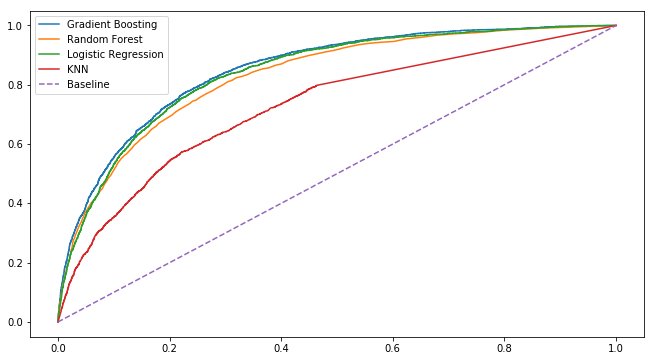

In [107]:
plt.figure(figsize=(11,6))
gb_fpr, gb_tpr, gb_thresholds = metrics.roc_curve(y_test, gb_probs[:,1])
plt.plot(gb_fpr, gb_tpr, label='Gradient Boosting')
rf_fpr, rf_tpr, rf_thresholds = metrics.roc_curve(y_test, rf_probs[:,1])
plt.plot(rf_fpr, rf_tpr, label='Random Forest')
lr_fpr, lr_tpr, lr_thresholds = metrics.roc_curve(y_test, lr_probs[:,1])
plt.plot(lr_fpr, lr_tpr, label='Logistic Regression')
knn_fpr, knn_tpr, knn_thresholds = metrics.roc_curve(y_test, knn_probs[:,1])
plt.plot(knn_fpr, knn_tpr, label='KNN')
plt.plot(np.arange(0,1.1,0.1), np.arange(0,1.1,0.1), label='Baseline', linestyle='--')
plt.legend();

In [111]:
print('GB ', metrics.roc_auc_score(y, gb_predict))
print('RF ', metrics.roc_auc_score(y, rf_predict))
print('LR ', metrics.roc_auc_score(y, lr_predict))
print('KNN', metrics.roc_auc_score(y, knn_predict))

GB  0.693278031456
RF  0.685847962518
LR  0.769842206171
KNN 0.625767913054


### Logistic Regression clearly dominates based on a cross-validated ROC-AUC score, so we will select this model as our main classification model.

In [144]:
print(metrics.confusion_matrix(y, lr_predict))
print('F1:      ', metrics.f1_score(y, lr_predict))
print('Accuracy:', metrics.accuracy_score(y, lr_predict))
print('ROC-AUC: ', metrics.roc_auc_score(y, lr_predict))

[[33668 11159]
 [ 2604  9715]]
F1:       0.585364384057
Accuracy: 0.759160746159
ROC-AUC:  0.769842206171


Let's compare against our baseline:

In [148]:
y.value_counts()[0] / y.shape[0]

0.78442935638539879

So our best classification model has a worse accuracy than a baseline prediction.